In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

In [19]:
X,y = make_circles(n_samples=500,noise=0.02,factor=0.7)

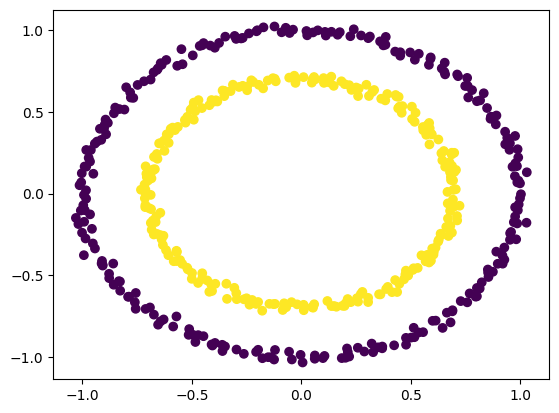

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [21]:
X.shape

(500, 2)

In [17]:
x1 = X[:,0]
x2 = X[:,1]
x3 = x1**2 + x2**2
Xn = np.column_stack((X,x3))

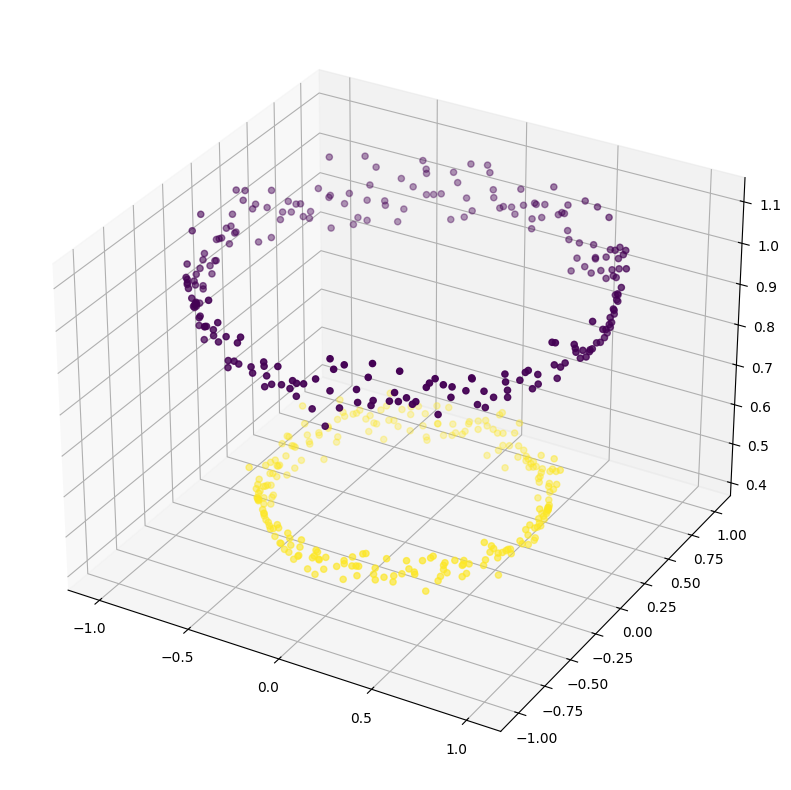

In [16]:
fig = plt.figure(figsize=((10,10)))
axes = fig.add_subplot(111,projection = '3d')
axes.scatter(Xn[:,0],Xn[:,1],Xn[:,2],c=y,depthshade=True)
plt.show()

In [22]:
clf = svm.SVC(kernel = 'poly',degree=2)
clf.fit(X,y)

SVC(degree=2, kernel='poly')

In [23]:
clf.score(X,y)

1.0

In [20]:
w = clf.coef_
b = clf.intercept_

In [21]:
w

array([[ 0.04359883, -0.01958043, -4.89277156]])

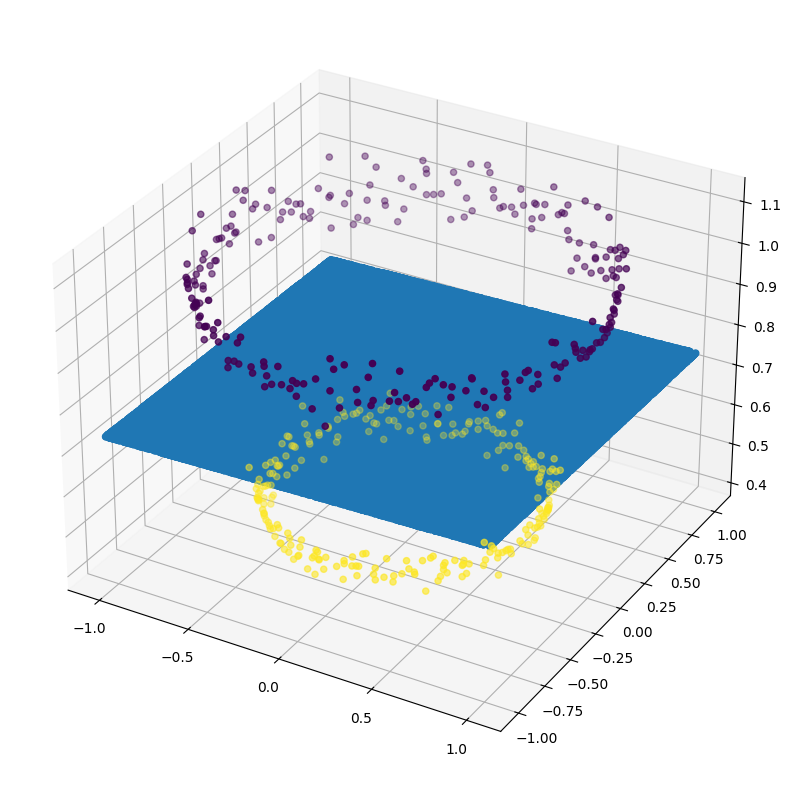

In [23]:
x1 = Xn[:,0]
x2 = Xn[:,1]

x1,x2 = np.meshgrid(x1,x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b)/w[0][2]

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection = '3d')
axes.scatter(Xn[:,0],Xn[:,1],Xn[:,2],c=y,depthshade=True)

axes.scatter(x1,x2,x3,alpha=1)

plt.show()

In [29]:
# clf = svm.SVC(kernel = 'linear')
clf = svm.SVC(kernel = 'poly',degree=2)
# clf = svm.SVC(kernel = 'rbf')
clf.fit(X,y)
clf.score(X,y)

1.0

In [25]:
def custom_kernel(x,z):
    return np.square(np.dot(x,z.T))

In [26]:
clf = svm.SVC(kernel = custom_kernel)
clf.fit(X,y)
clf.score(X,y)

1.0

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

# Initialize GridSearchCV
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3,cv=2)

# Fit the model
grid.fit(X, y)

# Print best parameters and estimator
print(grid.best_params_)
print(grid.best_estimator_)

# Make predictions
grid_predictions = grid.predict(X)

# Print classification report
print(classification_report(y, grid_predictions))

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.996 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.996 total time=   0.0s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.564 total time=   0.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.560 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.508 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.484 total time=   0.0s
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.480 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.480 total time=   0.0s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;